In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [5]:
df = pd.read_csv("energy_consumption.csv", encoding="latin1")
df.head()


,MAIN CATEGORIES,CATEGORIES,REFERENCE,ACORN-A,ACORN-B,ACORN-C,ACORN-D,ACORN-E,ACORN-F,ACORN-G,ACORN-H,ACORN-I,ACORN-J,ACORN-K,ACORN-L,ACORN-M,ACORN-N,ACORN-O,ACORN-P,ACORN-Q
0,POPULATION,Age,Age 0-4,77.0,83.0,72.0,100.0,120.0,77.0,97.0,97.0,63.0,119.0,67.0,114.0,113.0,89.0,123.0,138.0,133.0
1,POPULATION,Age,Age 5-17,117.0,109.0,87.0,69.0,94.0,95.0,102.0,106.0,67.0,95.0,64.0,108.0,116.0,86.0,89.0,136.0,106.0
2,POPULATION,Age,Age 18-24,64.0,73.0,67.0,107.0,100.0,71.0,83.0,89.0,62.0,104.0,459.0,97.0,96.0,86.0,117.0,109.0,110.0
3,POPULATION,Age,Age 25-34,52.0,63.0,62.0,197.0,151.0,66.0,90.0,88.0,63.0,132.0,145.0,109.0,96.0,90.0,140.0,120.0,120.0
4,POPULATION,Age,Age 35-49,102.0,105.0,91.0,124.0,118.0,93.0,102.0,103.0,76.0,111.0,67.0,99.0,98.0,90.0,102.0,103.0,100.0


In [6]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826 entries, 0 to 825
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MAIN CATEGORIES  826 non-null    object 
 1   CATEGORIES       826 non-null    object 
 2   REFERENCE        825 non-null    object 
 3   ACORN-A          826 non-null    float64
 4   ACORN-B          826 non-null    float64
 5   ACORN-C          826 non-null    float64
 6   ACORN-D          826 non-null    float64
 7   ACORN-E          826 non-null    float64
 8   ACORN-F          826 non-null    float64
 9   ACORN-G          826 non-null    float64
 10  ACORN-H          826 non-null    float64
 11  ACORN-I          826 non-null    float64
 12  ACORN-J          826 non-null    float64
 13  ACORN-K          826 non-null    float64
 14  ACORN-L          826 non-null    float64
 15  ACORN-M          826 non-null    float64
 16  ACORN-N          826 non-null    float64
 17  ACORN-O         

,ACORN-A,ACORN-B,ACORN-C,ACORN-D,ACORN-E,ACORN-F,ACORN-G,ACORN-H,ACORN-I,ACORN-J,ACORN-K,ACORN-L,ACORN-M,ACORN-N,ACORN-O,ACORN-P,ACORN-Q
count,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000
mean,131.313495,110.860256,100.080789,136.857507,117.894757,95.574535,101.444276,97.298915,87.028545,104.216563,127.482911,93.724209,91.410277,79.912379,95.579335,100.141309,90.855423
std,201.448212,42.464050,30.099529,97.740794,35.768807,33.636661,21.798994,18.229234,30.337794,19.924033,97.428159,22.177041,22.909602,33.995192,25.935770,37.210288,37.634017
min,12.000000,0.957011,0.281968,2.000000,21.000000,0.000000,0.791419,1.155448,6.363259,16.050708,17.000000,0.393546,0.714857,2.000000,11.000000,9.000000,1.000000
25%,87.000000,94.000000,86.000000,93.092150,99.000000,81.000000,94.138076,91.000000,70.000000,97.000000,85.000000,86.000000,82.000000,60.253502,86.000000,82.250000,71.250000
50%,104.000000,107.000000,100.000000,121.000000,117.000000,98.000000,102.000000,99.000000,88.000000,105.000000,109.000000,95.000000,93.000000,74.000000,96.000000,96.000000,87.000000
75%,128.000000,122.000000,113.000000,154.000000,135.000000,108.000000,109.000000,105.000000,101.750000,115.000000,144.000000,102.000000,101.000000,93.158386,104.000000,109.000000,101.000000
max,3795.000000,419.000000,272.000000,1159.034650,286.000000,462.000000,295.000000,192.000000,410.000000,197.000000,1821.000000,280.000000,161.000000,295.000000,252.000000,389.000000,326.000000


In [10]:
acorn_cols = [col for col in df.columns if col.startswith("ACORN")]
acorn_cols

X = df[acorn_cols].T
X.head()


,0,1,2,3,4,5,6,7,8,9,...,816,817,818,819,820,821,822,823,824,825
ACORN-A,77.0,117.0,64.0,52.0,102.0,124.0,125.0,112.0,107.0,30.0,...,402.0,2280.0,133.0,3795.0,2652.0,171.0,298.0,272.0,196.0,308.0
ACORN-B,83.0,109.0,73.0,63.0,105.0,121.0,120.0,103.0,101.0,95.0,...,149.0,344.0,150.0,116.0,126.0,137.0,278.0,295.0,186.0,181.0
ACORN-C,72.0,87.0,67.0,62.0,91.0,120.0,152.0,157.0,103.0,45.0,...,85.0,79.0,150.0,116.0,88.0,94.0,138.0,272.0,166.0,181.0
ACORN-D,100.0,69.0,107.0,197.0,124.0,72.0,55.0,49.0,114.0,2.0,...,214.0,84.0,153.0,58.0,424.0,220.0,119.0,44.0,49.0,55.0
ACORN-E,120.0,94.0,100.0,151.0,118.0,82.0,61.0,57.0,106.0,49.0,...,171.0,56.0,128.0,58.0,108.0,196.0,93.0,44.0,49.0,55.0


In [11]:
X = X.fillna(X.mean())
X = X.clip(lower=0)


In [12]:
X.to_csv("cleaned_acorn_data.csv")


In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [14]:
normalized_df = pd.DataFrame(X_scaled, index=X.index)
normalized_df.to_csv("normalized_acorn_data.csv")


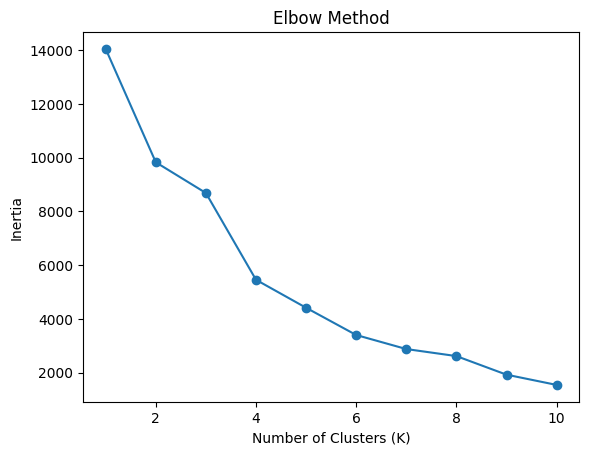

In [15]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [16]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [17]:
pca_df = pd.DataFrame(
    X_pca,
    columns=["PCA_1", "PCA_2"],
    index=X.index
)

pca_df.to_csv("pca_acorn_features.csv")


In [18]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

pca_df["Cluster"] = clusters


In [19]:
score = silhouette_score(X_pca, clusters)
print("Silhouette Score:", score)


Silhouette Score: 0.4516694835899027


In [20]:
pca_df.to_csv("clustered_acorn_profiles.csv")


In [21]:
cluster_profiles = pd.DataFrame(X, index=X.index)
cluster_profiles["Cluster"] = clusters
cluster_profiles.groupby("Cluster").mean()


/tmp/ipython-input-3818315052.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cluster_profiles["Cluster"] = clusters


,0,1,2,3,4,5,6,7,8,9,...,816,817,818,819,820,821,822,823,824,825
Cluster,,,,,,,,,,,,,,,,,,,,,
0,88.857143,101.571429,78.714286,79.000000,101.000000,113.857143,117.857143,107.000000,100.714286,125.714286,...,141.142857,420.000000,125.285714,608.428571,443.142857,112.142857,159.285714,159.857143,138.857143,176.285714
1,110.428571,101.142857,96.714286,105.428571,95.428571,94.571429,99.857143,108.428571,97.857143,75.428571,...,61.428571,37.571429,73.428571,58.000000,50.428571,74.714286,42.142857,43.000000,70.428571,48.000000
2,95.666667,75.666667,222.000000,164.333333,103.000000,65.000000,48.333333,46.000000,105.000000,35.666667,...,234.333333,56.666667,115.333333,58.000000,192.000000,180.000000,89.333333,38.666667,48.666667,51.333333


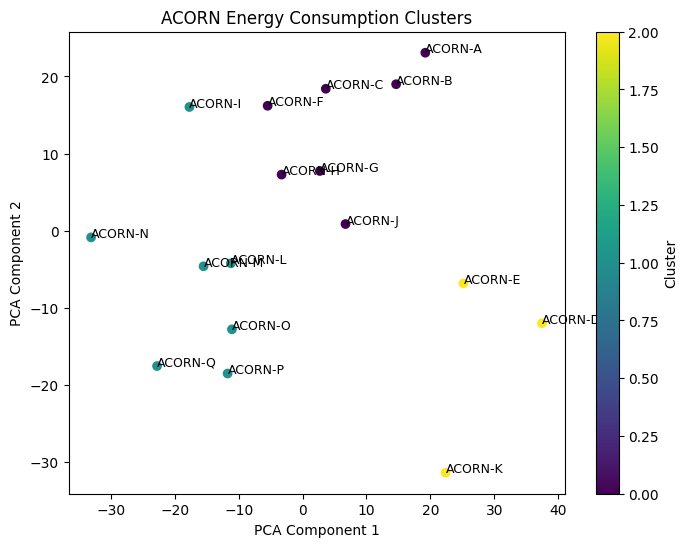

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(
    X_pca[:,0],
    X_pca[:,1],
    c=clusters,
    cmap="viridis"
)
for i, label in enumerate(X.index):
    plt.text(X_pca[i,0], X_pca[i,1], label, fontsize=9)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("ACORN Energy Consumption Clusters")
plt.colorbar(label="Cluster")
plt.show()


In [23]:
import os
os.listdir()


['.config',
 'energy_consumption.csv',
 'clustered_acorn_profiles.csv',
 'cleaned_acorn_data.csv',
 'pca_acorn_features.csv',
 'normalized_acorn_data.csv',
 '.ipynb_checkpoints',
 'sample_data']